In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [3]:
def standardization(x):
    return (x - x.mean(axis=0)) / x.std(axis=0)

In [4]:
X_st = standardization(X)

In [5]:
X_st

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [6]:
from sklearn import model_selection

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_st, y, test_size=0.2, random_state=1)

In [8]:
# Найдем собственные векторы и собственные значения (англ. Eigenvalues)

covariance_matrix = X_train.T.dot(X_train)

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения в порядке убывания:
(353.42901800751747, array([ 0.52931569, -0.23698255,  0.58048601,  0.57157691]))
(103.57739389569761, array([-0.33308299, -0.9403434 , -0.01311446, -0.0681031 ]))
(19.62370121412111, array([-0.73107351,  0.21110414,  0.12614007,  0.63643951]))
(2.1664076346694565, array([ 0.27278591, -0.12259124, -0.80433369,  0.51342628]))


Оценим долю дисперсии, которая описывается найденными компонентами.

In [9]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперя оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[73.81612077139076, 21.632862689356486, 4.098547162226619, 0.4524693770261449]
Кумулятивная доля дисперсии по компонентам 
[ 73.81612077  95.44898346  99.54753062 100.        ]


Таким образом, первая главная компонента описывает почти 73% информации, а первые две в сумме - 95.8%. В то же время последняя компонента описывает всего 0.5% и может быть отброжена без страха значительных потерь в качестве нашего анализа. Мы отбросим последние две компоненты, оставив первые две.

In [10]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52931569 -0.33308299]
 [-0.23698255 -0.9403434 ]
 [ 0.58048601 -0.01311446]
 [ 0.57157691 -0.0681031 ]]


In [11]:
# Сформируем новую матрицу "объекты-признаки"
Z = X_test.dot(W)

In [12]:
Z[:10]

array([[-2.13788861, -1.91439221],
       [-0.49753054,  1.52098252],
       [ 0.87936759, -0.20405104],
       [-2.15641105, -1.55516688],
       [ 2.3880095 , -2.52912475],
       [ 0.7727574 , -0.75253149],
       [ 1.92531771, -0.6274907 ],
       [-2.09630662, -1.22209836],
       [-2.27499097,  0.25828681],
       [ 2.06872508, -0.84842706]])

**Используем KNeighborsClassifier**

In [13]:
from sklearn.neighbors import KNeighborsClassifier
neigh_4= KNeighborsClassifier(n_neighbors=3)
neigh_4.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
y_pred_4=neigh_4.predict(X_test)
y_pred_4

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [15]:
neigh_2 = KNeighborsClassifier(n_neighbors=3)
neigh_2.fit(Z, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
y_pred_2=neigh_2.predict(Z)
y_pred_2

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 1])

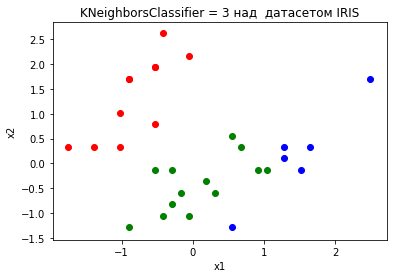

In [17]:
#  KNeighborsClassifier без применения PCA
plt.figure()
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X_test[y_pred_4==i, 0], X_test[y_pred_4==i, 1], c=c)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KNeighborsClassifier = 3 над  датасетом IRIS')
plt.show()

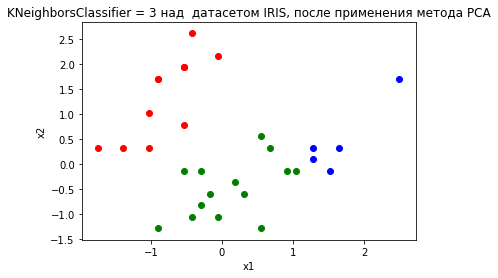

In [18]:
#  KNeighborsClassifier c применением  PCA
plt.figure()
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X_test[y_pred_2==i, 0], X_test[y_pred_2==i, 1], c=c)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KNeighborsClassifier = 3 над  датасетом IRIS, поcле применения метода PCA')
plt.show()

In [19]:
from sklearn import metrics

# Точность  KNeighborsClassifier при применении PCA
score = metrics.accuracy_score(y_test,y_pred_2)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.966667


In [20]:
# Точность при применении KNeighborsClassifier без PCA
score = metrics.accuracy_score(y_test,y_pred_4)
print('Accuracy:{0:f}'.format(score))

Accuracy:1.000000


In [21]:
# Точность в сравнении KNeighborsClassifier с PCA и без 
score = metrics.accuracy_score(y_pred_4,y_pred_2)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.966667
